## Creating a generative AI with twinlab

In [69]:
# Package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# twinlab imports
import twinlab as tl

In [78]:
# Parameters
# experiment = "MNIST"
experiment = "CIFAR-10"

In [79]:
# Functions

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [80]:
# Seed
np.random.seed(123)

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
(10000, 3072)


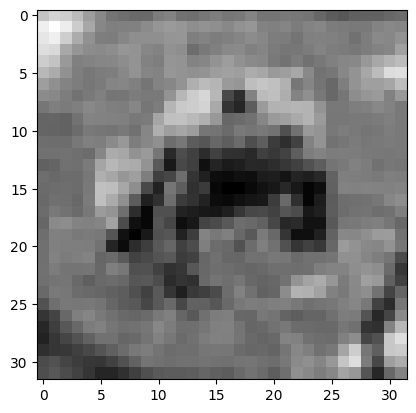

,R-0-0,R-0-1,R-0-2,R-0-3,R-0-4,R-0-5,R-0-6,R-0-7,R-0-8,R-0-9,...,B-31-23,B-31-24,B-31-25,B-31-26,B-31-27,B-31-28,B-31-29,B-31-30,B-31-31,number
0,59,43,50,68,98,119,139,145,149,149,...,58,65,59,46,57,104,140,84,72,6
1,154,126,105,102,125,155,172,180,142,111,...,42,67,101,122,133,136,139,142,144,9
2,255,253,253,253,253,253,253,253,253,253,...,83,80,69,66,72,79,83,83,84,9
3,28,37,38,42,44,40,40,24,32,43,...,39,59,42,44,48,38,28,37,46,4
4,170,168,177,183,181,177,181,184,189,189,...,88,85,82,83,79,78,82,78,80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,18,18,21,23,24,23,24,25,22,19,...,24,33,41,45,39,39,39,34,37,3
9996,235,240,249,253,254,253,254,254,179,108,...,89,113,139,163,174,179,182,181,181,9
9997,71,60,74,73,87,125,179,231,250,252,...,70,67,66,70,81,78,68,69,68,1
9998,250,254,211,64,61,60,55,54,55,59,...,134,132,130,127,132,133,215,255,254,1


In [81]:
if experiment == "MNIST":

    # Read data
    # filepath = str(pathlib.Path(__file__).parent.resolve()) + "/tmp"
    npix = 8
    filepath = '/Users/michellebieger/Documents/digi/doggen/single_in_multi_out_sample/tmp'
    df = pd.read_csv(filepath + "/Training_Data.csv")

elif experiment == "CIFAR-10":

    data = unpickle("cifar-10-batches-py/data_batch_1")
    print(data.keys())
    print(data[b"data"].shape)

    npix = 32
    image = data[b"data"][0, :1024].reshape(npix, npix)
    plt.imshow(image, cmap="binary")
    plt.show()

    df = pd.DataFrame(data[b"data"])
    df.columns = [f"{RGB}-{i}-{j}" for RGB in ["R", "G", "B"] for i in range(npix) for j in range(npix)]
    df["number"] = data[b"labels"]

else:

    raise ValueError("Experiement not recognised")

display(df)

Data campaign

In [91]:
# Set up campaign
inputs = ["number"]
# outputs = list(df.drop(columns=['number']))
outputs = [f"R-{i}-{j}" for i in range(npix) for j in range(npix)]
setup_dict = {
    "inputs": inputs,
    "outputs": outputs,
    'estimator': 'gaussian_process_regression',
    'decompose_outputs': True,
    'output_explained_variance': 0.75
}
campaign = tl.Campaign(**setup_dict)

# Run campaign
train_dict = {
    "df": df,
    "train_test_split": 200,
}
campaign.fit(**train_dict)

,R-0-0,R-0-1,R-0-2,R-0-3,R-0-4,R-0-5,R-0-6,R-0-7,R-0-8,R-0-9,...,R-31-22,R-31-23,R-31-24,R-31-25,R-31-26,R-31-27,R-31-28,R-31-29,R-31-30,R-31-31
0,148.402715,146.728299,148.063247,147.141664,146.581420,147.531887,147.597073,147.092818,146.752784,146.519479,...,112.123933,115.099529,115.223815,115.618384,116.864113,117.811216,118.159531,117.262663,117.393614,117.930245
1,147.204387,145.347977,146.374431,145.531443,145.375824,146.119605,145.329672,143.453778,142.907641,143.242576,...,125.367036,128.465683,128.874284,129.706083,131.209226,131.699719,132.467345,131.981042,131.275771,130.880542
2,131.684138,130.530362,132.440756,131.149364,130.338442,131.110701,131.398348,131.668418,131.903157,131.236894,...,119.270664,120.745717,120.170505,120.038874,120.062100,119.535861,118.607101,117.321306,117.362048,118.161267
3,121.038271,120.348083,121.986325,120.311144,119.632619,120.202273,120.386288,121.223380,122.698145,122.555282,...,126.690655,127.987248,127.712356,128.135100,127.535908,125.725906,125.210331,124.273179,124.095472,124.301556
4,112.075228,110.943630,112.396990,111.079262,110.773658,111.163957,111.300611,112.738168,114.868643,114.601744,...,132.667971,134.109752,134.277731,134.844228,133.838960,131.356667,130.937309,129.886631,129.254045,129.431186
5,110.967441,110.161262,111.144623,109.440457,109.214540,109.751433,110.032659,111.995930,115.055443,115.226504,...,132.337219,134.028107,134.712148,136.043807,134.779142,131.911564,132.071848,131.387514,131.275099,131.255004
6,120.536537,118.717048,119.579365,118.490529,118.733454,119.430217,119.389202,120.933122,123.523385,123.240981,...,133.483465,135.825631,137.119725,138.477350,137.626654,135.370876,135.572714,134.741632,134.292723,134.383239
7,131.956631,129.288696,130.498339,129.843743,130.152389,131.239781,131.469045,133.208324,135.111899,133.925819,...,123.809356,126.252995,127.540523,128.339337,127.682091,126.370104,125.853352,124.481312,124.230846,125.218948
8,146.079158,143.054880,144.173051,143.386974,143.679756,145.420644,145.868554,147.200850,148.748797,147.864211,...,112.754066,115.750587,117.366050,118.243438,118.046383,117.697878,117.454200,116.245690,116.426530,117.944549
9,161.678899,157.732641,158.241120,157.722551,158.550548,160.790143,160.567166,160.058511,160.972162,161.108773,...,114.397053,118.874335,121.609207,123.086974,124.011540,124.681963,125.724604,125.200973,124.869908,126.105781


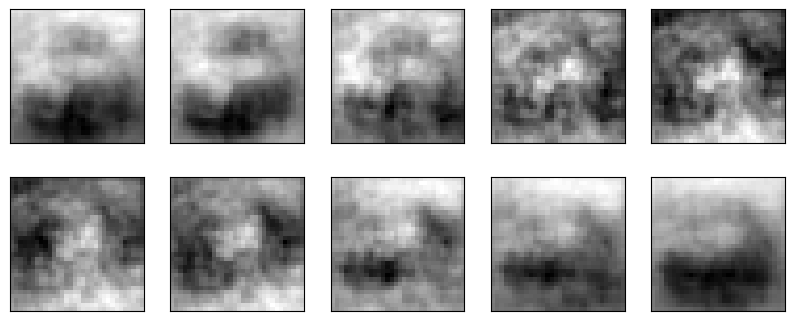

In [92]:
df_predict = pd.DataFrame({'number': list(range(10))})
# df_predict = ['R00']
# display(df_predict)
# campaign.predict(df_predict)
df_mean, _ = campaign.predict(df_predict)
display(df_mean)

plt.subplots(2, 5, figsize=(10, 4))
iplot = 0
for row in range(10):
    iplot += 1
    plt.subplot(2,5,iplot)
    plt.imshow(df_mean.iloc[row].to_numpy().reshape(npix, npix), cmap="binary_r")
    plt.xticks([]); plt.yticks([])
plt.show()

Output

output       R-0-0                                                  \
sample           0           1           2           3           4   
0       145.283230  137.679209  152.244312  144.175242  144.547148   
1       148.264344  139.935063  157.120476  143.244434  131.343178   
2       131.422946  125.226422  139.295125  132.287018  116.174082   
3       124.900909  117.004495  126.794835  133.132501  113.595180   
4       110.171037  108.270289  116.935878  127.739904  113.702368   
5       110.827136  113.044073  105.415520  117.165337  110.170431   
6       118.783585  113.069757  112.479179  110.361328  116.144435   
7       128.761431  124.020592  126.490865  113.515325  129.406385   
8       136.887129  134.376612  147.447290  131.744108  148.141664   
9       149.969493  155.362868  173.635290  159.325715  167.007720   

output                                                              ...  \
sample           5           6           7           8           9  ...   
0       137.594529  137.131609  146.471379  165.467349  147.577360  ...   
1       145.497178  140.676926  147.549571  157.306514  139.492440  ...   
2       137.469343  129.305298  131.950233  139.858964  116.054476  ...   
3       132.137913  125.076467  109.451835  124.393146  116.429026  ...   
4       115.121452  119.461175   97.948754  112.603888  116.011261  ...   
5       107.649725  115.465870  106.479516  107.047264  113.892432  ...   
6       120.837155  123.231895  120.381178  114.545283  115.964162  ...   
7       138.763389  118.518195  128.588330  123.918554  125.239093  ...   
8       145.373667  128.759807  140.722133  135.871017  142.480939  ...   
9       157.804075  141.116582  162.971766  159.155251  158.600299  ...   

output     R-31-31                                                  \
sample           0           1           2           3           4   
0       107.847995  115.630941  118.632477  114.068466   98.136480   
1       129.884136  134.616975  135.718966  140.190299  109.451118   
2       118.556466  124.492351  122.641738  126.520106  106.299101   
3       128.299058  134.503496  126.182118  136.677013  113.570423   
4       127.578833  134.929623  137.284409  144.453351  127.610753   
5       136.582342  140.918200  135.700237  136.551518  127.114896   
6       141.894965  136.891802  138.314572  134.656329  133.699774   
7       135.674174  133.033809  119.168779  119.075970  122.021922   
8       114.869064  105.243680  109.517992  110.360181  115.783151   
9       110.152644  119.945421  133.649587  123.331304  126.316014   

output                                                              
sample           5           6           7           8           9  
0       119.734551  114.116173  116.308010  133.373832  115.263550  
1       128.508675  126.524839  127.955704  137.824315  133.600225  
2       111.920021  118.447237  123.308439  128.291250  101.438396  
3       130.770070  121.509713  122.872981  134.969060  115.819406  
4       143.561528  133.957641  128.706434  148.620850  126.210888  
5       142.551993  133.555523  138.630024  136.437790  126.646720  
6       140.171076  140.118520  131.423373  141.138708  127.797604  
7       133.165885  113.567951  118.358490  140.667708  117.554955  
8       117.422047  112.342739  116.648469  124.178234  107.951697  
9       124.155307  118.343447  131.148929  124.001997  121.048974  

[10 rows x 10240 columns]

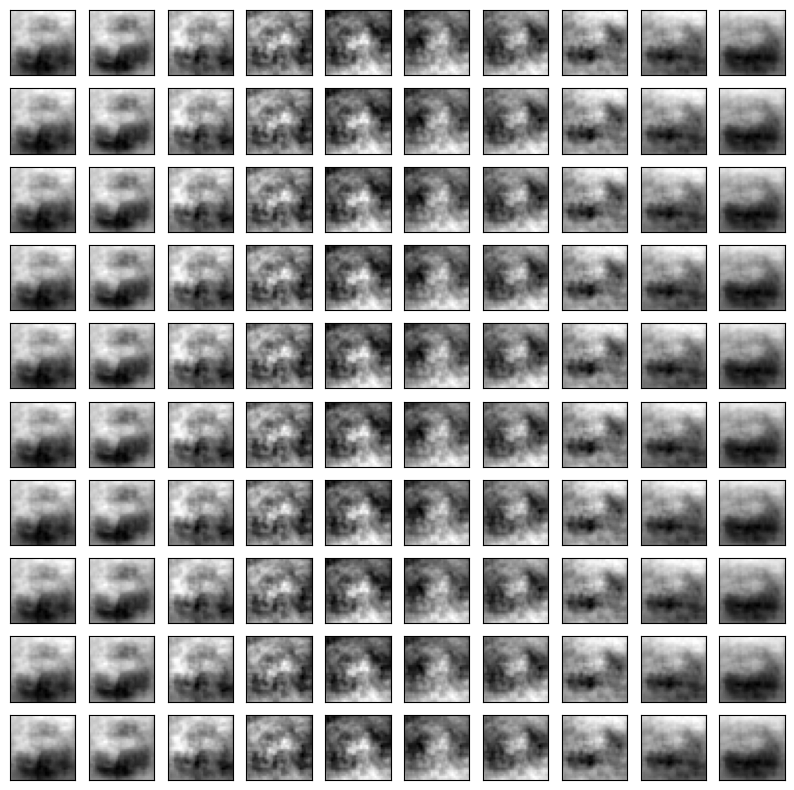

In [93]:
n = 10

df_samples = campaign.sample(df_predict, n)
display(df_samples)

# for i in range(n):
#     plt.imshow(image[:, :, i], cmap="binary")
#     plt.show()

nrow, ncol = n, 10
# npix should be 8
plt.subplots(nrow, ncol, figsize=(10, 1*n))
iplot = 0
for example in range(n):
    for row in range(10):
        iplot += 1
        plt.subplot(nrow, ncol, iplot)
        image = df_samples.iloc[example].to_numpy().reshape(npix, npix, n)
        image.shape
        plt.imshow(df_mean.iloc[row].to_numpy().reshape(npix,npix), cmap="binary_r")
        plt.xticks([]); plt.yticks([])
plt.show()